#Анализи на пандемијата COVID 19 
## Тема на проектот: Темата на оваа задача е да се направи анализа на повќе податочни множества и притоа со помош на визуелизација да се воочи бројот на потврдени, смртни и оздравени случаи секој ден ширум светот.
#### Предмет: Веб Базирани Системи
#### Студент: Габриел Димитриевски, 181225, СИИС


##### Датасетот е преземен од: https://www.kaggle.com/datasets/imdevskp/corona-virus-report

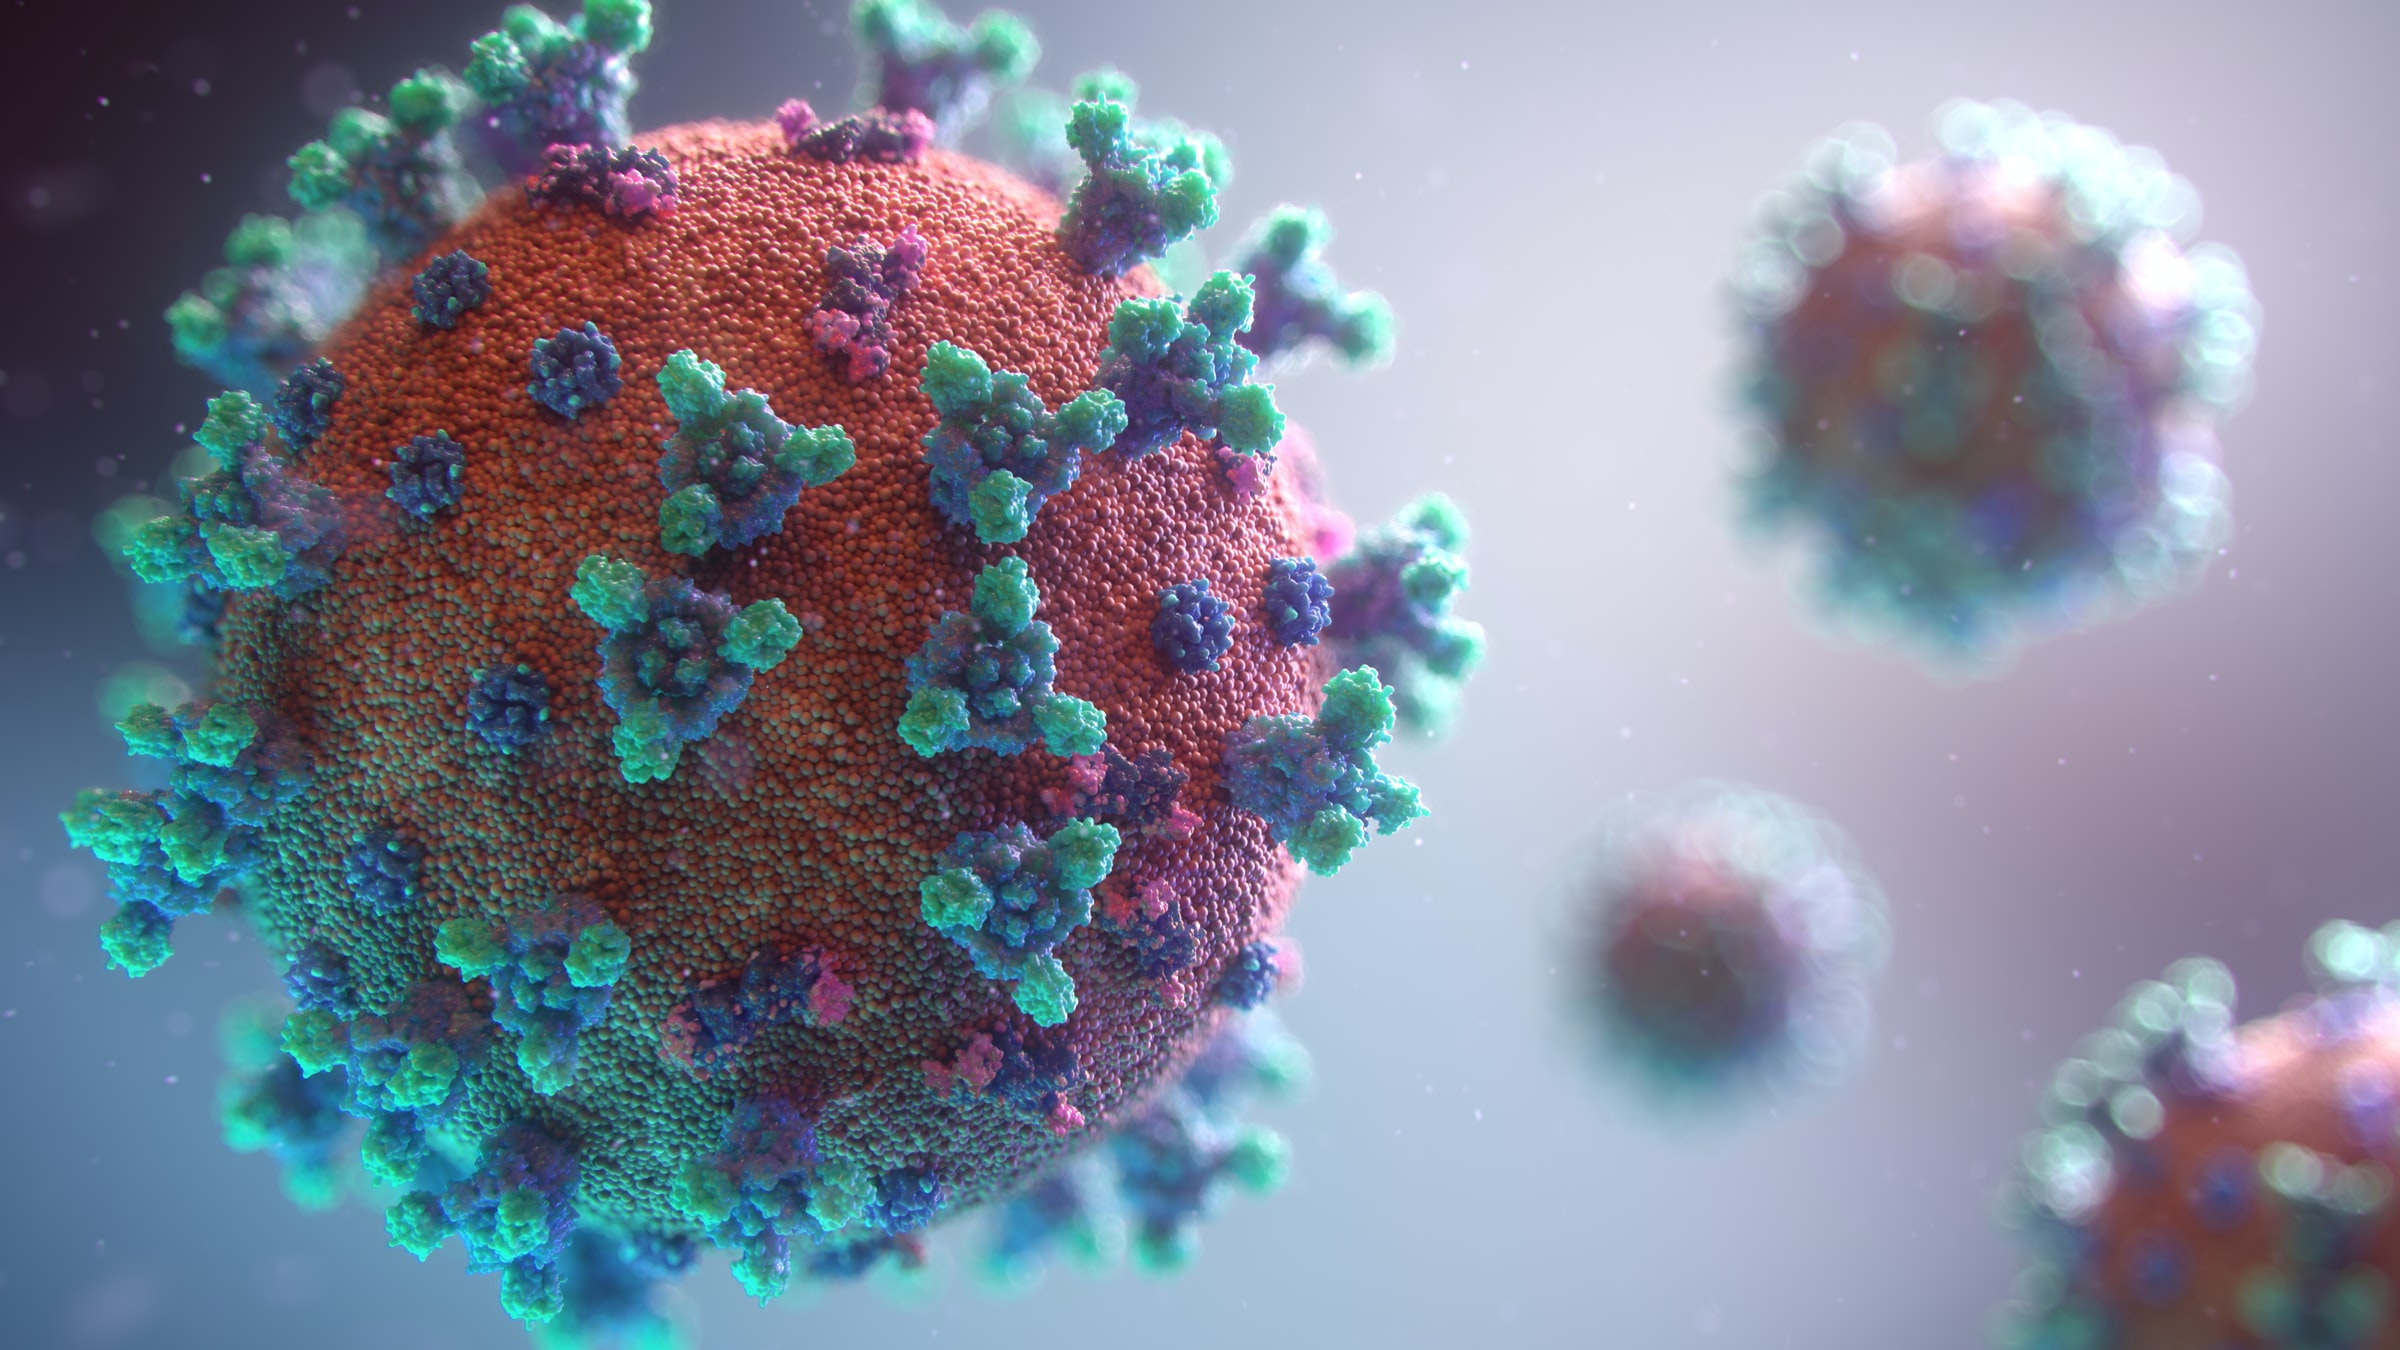

In [2]:
# Вчитување на библиотеки кои што ќе бидат потребни во текот на анализирањето
import time
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Вчитување на дел од податочните множества
world_wide_df = pd.read_csv("/content/worldometer_data.csv") # in general
daily_basis_df =  pd.read_csv("/content/full_grouped.csv") #daily basis

In [4]:
# Data types and values
daily_basis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [5]:
# Преглед на последните десет денови од дневната статистика на множеството
daily_basis_df.tail(10)

Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
35146  2020-07-27      United Kingdom     301708   45844       1437  254427   
35147  2020-07-27             Uruguay       1202      35        951     216   
35148  2020-07-27          Uzbekistan      21209     121      11674    9414   
35149  2020-07-27           Venezuela      15988     146       9959    5883   
35150  2020-07-27             Vietnam        431       0        365      66   
35151  2020-07-27  West Bank and Gaza      10621      78       3752    6791   
35152  2020-07-27      Western Sahara         10       1          8       1   
35153  2020-07-27               Yemen       1691     483        833     375   
35154  2020-07-27              Zambia       4552     140       2815    1597   
35155  2020-07-27            Zimbabwe       2704      36        542    2126   

       New cases  New deaths  New recovered             WHO Region  
35146        688           7              3                 Europe  
35147         10           1              3               Americas  
35148        678           5            569                 Europe  
35149        525           4            213               Americas  
35150         11           0              0        Western Pacific  
35151        152           2              0  Eastern Mediterranean  
35152          0           0              0                 Africa  
35153         10           4             36  Eastern Mediterranean  
35154         71           1            465                 Africa  
35155        192           2             24                 Africa

In [6]:
# Ја бришам трајно(inplace=True) колоната WHO Region од причина што анализите кои што ќе ги правам ќе бидат базирани
# на основа на држава
daily_basis_df.drop('WHO Region',inplace=True,axis=1)

In [7]:
# Проверка дали во податочното множество постојат вредности кои што се null
daily_basis_df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
dtype: int64

In [8]:
# Пресметка на стандардни статистични операции врз податочно множество
print ("Просечен број на регистирани луѓе на следниве основи: \n" + str(daily_basis_df.mean()))
print ("\nМаксимален број на нови забележани случаи во еден ден: \n" + str(daily_basis_df['New cases'].max()))
print ("\nМинимален број на нови забележани случаи во еден ден: \n" + str(daily_basis_df['New cases'].min()))
print ("\nМаксимален број на нови забележани случаи кои што се излечиле во еден ден: \n" + str(daily_basis_df['New recovered'].max()))
print ("\nМаксимален број на активни случаи кои што се излечиле во еден ден: \n" + str(daily_basis_df['Active'].max()))

Просечен број на регистирани луѓе на следниве основи: 
Confirmed        23566.631073
Deaths            1234.068239
Recovered        11048.134856
Active           11284.427978
New cases          469.363750
New deaths          18.603339
New recovered      269.315593
dtype: float64

Максимален број на нови забележани случаи во еден ден: 
77255

Минимален број на нови забележани случаи во еден ден: 
0

Максимален број на нови забележани случаи кои што се излечиле во еден ден: 
140050

Максимален број на активни случаи кои што се излечиле во еден ден: 
2816444


In [9]:
# Дополнителни математички пресметки:
daily_basis_df.describe()

Confirmed         Deaths     Recovered        Active    New cases  \
count  3.515600e+04   35156.000000  3.515600e+04  3.515600e+04  35156.00000   
mean   2.356663e+04    1234.068239  1.104813e+04  1.128443e+04    469.36375   
std    1.499818e+05    7437.238354  6.454640e+04  8.997149e+04   3005.86754   
min    0.000000e+00       0.000000  0.000000e+00 -2.000000e+00      0.00000   
25%    1.000000e+00       0.000000  0.000000e+00  0.000000e+00      0.00000   
50%    2.500000e+02       4.000000  3.300000e+01  8.500000e+01      2.00000   
75%    3.640250e+03      78.250000  1.286250e+03  1.454000e+03     75.00000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  77255.00000   

         New deaths  New recovered  
count  35156.000000   35156.000000  
mean      18.603339     269.315593  
std      115.706351    2068.063852  
min    -1918.000000  -16298.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        1.000000      20.000000  
max     3887.000000  140050.000000

In [10]:
# Целосно вкупно за во Јемен
sum_Yemen_df = daily_basis_df.drop('Date',inplace=False,axis=1).copy()

In [11]:
# Податочното множество без Датум
sum_Yemen_df.tail(3)

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
35153          Yemen       1691     483        833     375         10   
35154         Zambia       4552     140       2815    1597         71   
35155       Zimbabwe       2704      36        542    2126        192   

       New deaths  New recovered  
35153           4             36  
35154           1            465  
35155           2             24

In [12]:
sum_Yemen_df[sum_Yemen_df['Country/Region']=='Yemen'].sum()

Country/Region    YemenYemenYemenYemenYemenYemenYemenYemenYemenY...
Confirmed                                                     67180
Deaths                                                        17707
Recovered                                                     23779
Active                                                        25694
New cases                                                      1691
New deaths                                                      483
New recovered                                                   833
dtype: object


# **Визуелизација на податоците од дневен извештај**

**Визуелизација на соодносот помеѓу нови заразени и нови починати во еден ден**

In [13]:
 # Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Сооднос помеѓу нови заразени и нови починати')

<Figure size 432x288 with 0 Axes>

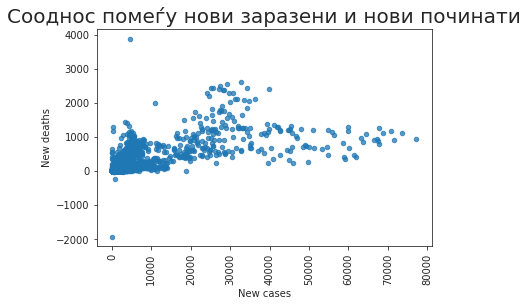

In [14]:
fig = plt.figure()
daily_basis_df.plot.scatter(x= 'New cases', y = 'New deaths', alpha = 0.75,rot=0)
plt.xticks(rotation=90)
plt.title(f'Сооднос помеѓу нови заразени и нови починати', size=20)


**Визуелизација на соодносот помеѓу нови заразени и нови излечени во еден ден**

In [15]:
# Конвертирање од стринг во време
daily_basis_df['Date']= pd.to_datetime(daily_basis_df['Date']) 

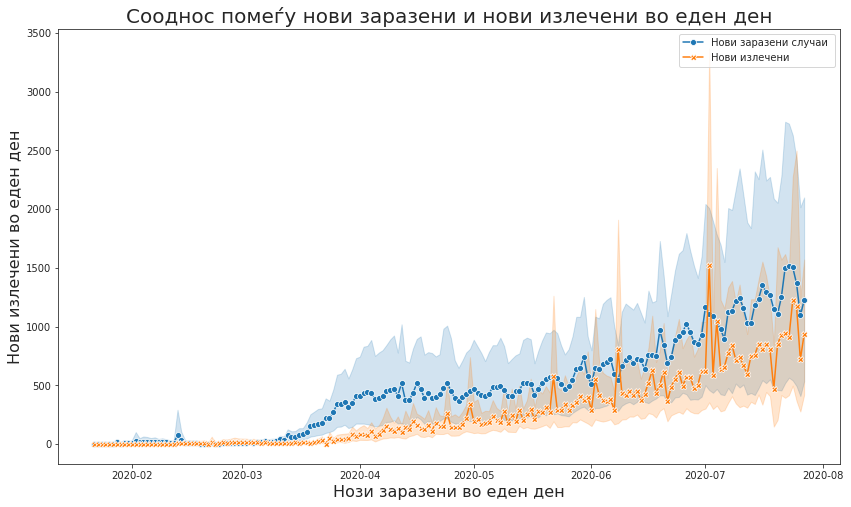

In [16]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Date', y='New cases', data=daily_basis_df, marker='o')
sns.lineplot(x='Date', y='New recovered', data=daily_basis_df ,marker='X')
plt.xlabel('Нози заразени во еден ден',size=16)
plt.ylabel('Нови излечени во еден ден',size=16)
plt.title(f'Сооднос помеѓу нови заразени и нови излечени во еден ден', size=20)
plt.legend(labels=['Нови заразени случаи ', 'Нови излечени'])

**Корелација помеѓу елементите во податочното множество**

In [17]:
fig = px.imshow(daily_basis_df.corr(), text_auto=True, width=1000, height=1000)
fig.show()

**Хистограм на податоција според различни основи врз база на регион**

In [18]:
for column_name in daily_basis_df.columns[2:]:
    fig = px.histogram(daily_basis_df, x='Country/Region', y=column_name, nbins=len(daily_basis_df))
    fig.show()

**Визуелизација на соодносот помеѓу нови излечени, нови починати и нови заразени во последниот ден од запишаните податоци во ова податочно множество**

In [19]:
lastReport = len(daily_basis_df.index)-1
latestReportToShow = daily_basis_df.loc[lastReport,["New cases", "New recovered", "New deaths"]]
print(latestReportToShow)


New cases        192
New recovered     24
New deaths         2
Name: 35155, dtype: object


In [21]:
fig = px.pie(latestReportToShow, title=f'Последен запишан ден во податочното множество од Covid 19 вирусот\n', 
             values=latestReportToShow.values, names=["New cases", "New recovered", "New deaths"])
fig.show()

**Визуелизација на нови починати наспорти нови оздравени**

In [22]:
daily_basis_df.drop('Date',inplace=True,axis=1)

In [23]:
daily_basis_df.tail(5)

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
35151  West Bank and Gaza      10621      78       3752    6791        152   
35152      Western Sahara         10       1          8       1          0   
35153               Yemen       1691     483        833     375         10   
35154              Zambia       4552     140       2815    1597         71   
35155            Zimbabwe       2704      36        542    2126        192   

       New deaths  New recovered  
35151           2              0  
35152           0              0  
35153           4             36  
35154           1            465  
35155           2             24

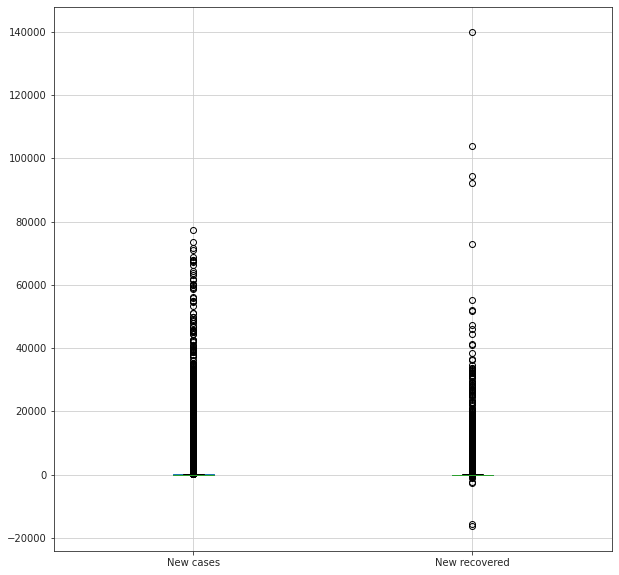

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
daily_basis_df.boxplot(column=['New cases', 'New recovered'])

# **Распространетоста на Covid 19 ширум светот**

In [25]:
# Детален преглед врз множеството во врска со распространетоста на вирусот
world_wide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [26]:
# Преименување на колини
world_wide_df_covid = world_wide_df.rename(columns = {'NewCases': 'New cases'
                          ,'NewDeaths': 'New deaths', 
                           'NewRecovered': 'New recovered',
                           'Country/Region' : 'Region'}, 
                inplace = False)

In [27]:
world_wide_df_covid.drop('WHO Region',inplace=True,axis=1)

In [28]:
world_wide_df_covid.head(5)

Region      Continent    Population  TotalCases  New cases  \
0           USA  North America  3.311981e+08     5032179        NaN   
1        Brazil  South America  2.127107e+08     2917562        NaN   
2         India           Asia  1.381345e+09     2025409        NaN   
3        Russia         Europe  1.459409e+08      871894        NaN   
4  South Africa         Africa  5.938157e+07      538184        NaN   

   TotalDeaths  New deaths  TotalRecovered  New recovered  ActiveCases  \
0     162804.0         NaN       2576668.0            NaN    2292707.0   
1      98644.0         NaN       2047660.0            NaN     771258.0   
2      41638.0         NaN       1377384.0            NaN     606387.0   
3      14606.0         NaN        676357.0            NaN     180931.0   
4       9604.0         NaN        387316.0            NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  
0           18296.0           15194.0          492.0  63139605.0      190640.0  
1            8318.0           13716.0          464.0  13206188.0       62085.0  
2            8944.0            1466.0           30.0  22149351.0       16035.0  
3            2300.0            5974.0          100.0  29716907.0      203623.0  
4             539.0            9063.0          162.0   3149807.0       53044.0

In [29]:
# Проверка дали имаме податоци кои што не ни се достапни
world_wide_df_covid.isnull().sum()

Region                0
Continent             1
Population            1
TotalCases            0
New cases           205
TotalDeaths          21
New deaths          206
TotalRecovered        4
New recovered       206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
dtype: int64

In [30]:
# NaN -> 0
from sklearn.impute import SimpleImputer
world_wide_df_final = world_wide_df_covid.copy()
main_imputer = SimpleImputer(strategy = 'constant',  fill_value = 0)
world_wide_df_final.iloc[:,:] = main_imputer.fit_transform(world_wide_df_final)
world_wide_df_final.isnull().sum()

Region              0
Continent           0
Population          0
TotalCases          0
New cases           0
TotalDeaths         0
New deaths          0
TotalRecovered      0
New recovered       0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
dtype: int64

In [31]:
world_wide_df_final.head(10)

Region      Continent    Population  TotalCases  New cases  \
0           USA  North America  3.311981e+08     5032179        0.0   
1        Brazil  South America  2.127107e+08     2917562        0.0   
2         India           Asia  1.381345e+09     2025409        0.0   
3        Russia         Europe  1.459409e+08      871894        0.0   
4  South Africa         Africa  5.938157e+07      538184        0.0   
5        Mexico  North America  1.290662e+08      462690     6590.0   
6          Peru  South America  3.301632e+07      455409        0.0   
7         Chile  South America  1.913251e+07      366671        0.0   
8      Colombia  South America  5.093626e+07      357710        0.0   
9         Spain         Europe  4.675665e+07      354530        0.0   

   TotalDeaths  New deaths  TotalRecovered  New recovered  ActiveCases  \
0     162804.0         0.0       2576668.0            0.0    2292707.0   
1      98644.0         0.0       2047660.0            0.0     771258.0   
2      41638.0         0.0       1377384.0            0.0     606387.0   
3      14606.0         0.0        676357.0            0.0     180931.0   
4       9604.0         0.0        387316.0            0.0     141264.0   
5      50517.0       819.0        308848.0         4140.0     103325.0   
6      20424.0         0.0        310337.0            0.0     124648.0   
7       9889.0         0.0        340168.0            0.0      16614.0   
8      11939.0         0.0        192355.0            0.0     153416.0   
9      28500.0         0.0             0.0            0.0          0.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  
0           18296.0           15194.0          492.0  63139605.0      190640.0  
1            8318.0           13716.0          464.0  13206188.0       62085.0  
2            8944.0            1466.0           30.0  22149351.0       16035.0  
3            2300.0            5974.0          100.0  29716907.0      203623.0  
4             539.0            9063.0          162.0   3149807.0       53044.0  
5            3987.0            3585.0          391.0   1056915.0        8189.0  
6            1426.0           13793.0          619.0   2493429.0       75521.0  
7            1358.0           19165.0          517.0   1760615.0       92022.0  
8            1493.0            7023.0          234.0   1801835.0       35374.0  
9             617.0            7582.0          610.0   7064329.0      151087.0

In [32]:
# Пресметка на стандардни статистични операции врз податочно множество
print ("Следнава статистика е во глобални рамки:")
print ("\nМаксимален број на сериозни/критични случаи во една држава: \n" + str(world_wide_df_final['Serious,Critical'].max()))
print ("\nПросечен број на сериозни/критични случаи од сите држави: \n" + str(world_wide_df_final['Serious,Critical'].mean()))
print ("\nПросечен број на направени тестови во текот на пандемијата од сите држави: \n" + str(world_wide_df_final['TotalTests'].mean()))
print ("\nПросечен број на направени тестови во текот на пандемијата на основа 1 милион од сите држави: \n" + str(world_wide_df_final['Tests/1M pop'].mean()))
print ("\nПросечен број на нови заразени на основа 1 милион од сите држави: \n" + str(world_wide_df_final['Tot Cases/1M pop'].mean()))

Следнава статистика е во глобални рамки:

Максимален број на сериозни/критични случаи во една држава: 
18296.0

Просечен број на сериозни/критични случаи од сите држави: 
311.9425837320574

Просечен број на направени тестови во текот на пандемијата од сите држави: 
1281623.4354066986

Просечен број на направени тестови во текот на пандемијата на основа 1 милион од сите држави: 
76728.41626794258

Просечен број на нови заразени на основа 1 милион од сите држави: 
3180.732057416268


In [33]:
# Целосна статистика за Јужна Америка
print ("South America: ")
world_wide_df_final[world_wide_df_final['Continent']=='South America'].sum()

South America: 


Region              BrazilPeruChileColombiaArgentinaEcuadorBolivia...
Continent           South AmericaSouth AmericaSouth AmericaSouth A...
Population                                                431110464.0
TotalCases                                                    4543273
New cases                                                      1282.0
TotalDeaths                                                  154885.0
New deaths                                                       80.0
TotalRecovered                                              3116150.0
New recovered                                                   936.0
ActiveCases                                                 1272238.0
Serious,Critical                                              14295.0
Tot Cases/1M pop                                             108441.0
Deaths/1M pop                                                  2818.0
TotalTests                                                 22379618.0
Tests/1M pop        

In [34]:
# Целосна статистика за Европа
print ("Europe: ")
world_wide_df_final[world_wide_df_final['Continent']=='Europe'].sum()

Europe: 


Region              RussiaSpainUKItalyGermanyFranceSwedenUkraineBe...
Continent           EuropeEuropeEuropeEuropeEuropeEuropeEuropeEuro...
Population                                                747677546.0
TotalCases                                                    2982576
New cases                                                         0.0
TotalDeaths                                                  205232.0
New deaths                                                        0.0
TotalRecovered                                              1587302.0
New recovered                                                     0.0
ActiveCases                                                  475261.0
Serious,Critical                                               5200.0
Tot Cases/1M pop                                             209454.0
Deaths/1M pop                                                  9673.0
TotalTests                                                 96125611.0
Tests/1M pop        

In [35]:
# Статистика за нашата држава
world_wide_df_final[world_wide_df_final['Region']=='North Macedonia'].sum()

Region              North Macedonia
Continent                    Europe
Population                2083365.0
TotalCases                    11399
New cases                       0.0
TotalDeaths                   517.0
New deaths                      0.0
TotalRecovered               7480.0
New recovered                   0.0
ActiveCases                  3402.0
Serious,Critical                3.0
Tot Cases/1M pop             5471.0
Deaths/1M pop                 248.0
TotalTests                 109946.0
Tests/1M pop                52773.0
dtype: object

**Визуелизација по континети за вкупно направени тестови**



In [36]:
# Прво треба да се направи поделба по континенти
world_wide_df_final

Region      Continent    Population  TotalCases  \
0                      USA  North America  3.311981e+08     5032179   
1                   Brazil  South America  2.127107e+08     2917562   
2                    India           Asia  1.381345e+09     2025409   
3                   Russia         Europe  1.459409e+08      871894   
4             South Africa         Africa  5.938157e+07      538184   
..                     ...            ...           ...         ...   
204             Montserrat  North America  4.992000e+03          13   
205  Caribbean Netherlands  North America  2.624700e+04          13   
206       Falkland Islands  South America  3.489000e+03          13   
207           Vatican City         Europe  8.010000e+02          12   
208         Western Sahara         Africa  5.986820e+05          10   

     New cases  TotalDeaths  New deaths  TotalRecovered  New recovered  \
0          0.0     162804.0         0.0       2576668.0            0.0   
1          0.0      98644.0         0.0       2047660.0            0.0   
2          0.0      41638.0         0.0       1377384.0            0.0   
3          0.0      14606.0         0.0        676357.0            0.0   
4          0.0       9604.0         0.0        387316.0            0.0   
..         ...          ...         ...             ...            ...   
204        0.0          1.0         0.0            10.0            0.0   
205        0.0          0.0         0.0             7.0            0.0   
206        0.0          0.0         0.0            13.0            0.0   
207        0.0          0.0         0.0            12.0            0.0   
208        0.0          1.0         0.0             8.0            0.0   

     ActiveCases  Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  \
0      2292707.0           18296.0           15194.0          492.0   
1       771258.0            8318.0           13716.0          464.0   
2       606387.0            8944.0            1466.0           30.0   
3       180931.0            2300.0            5974.0          100.0   
4       141264.0             539.0            9063.0          162.0   
..           ...               ...               ...            ...   
204          2.0               0.0            2604.0          200.0   
205          6.0               0.0             495.0            0.0   
206          0.0               0.0            3726.0            0.0   
207          0.0               0.0           14981.0            0.0   
208          1.0               0.0              17.0            2.0   

     TotalTests  Tests/1M pop  
0    63139605.0      190640.0  
1    13206188.0       62085.0  
2    22149351.0       16035.0  
3    29716907.0      203623.0  
4     3149807.0       53044.0  
..          ...           ...  
204        61.0       12220.0  
205       424.0       16154.0  
206      1816.0      520493.0  
207         0.0           0.0  
208         0.0           0.0  

[209 rows x 15 columns]

In [37]:
world_wide_df_final['Continent'].unique()

array(['North America', 'South America', 'Asia', 'Europe', 'Africa',
       'Australia/Oceania', 0], dtype=object)

In [38]:
# Поделби по континенти
lista = list()
for Continent in world_wide_df_final['Continent'].unique():
  lista.append(world_wide_df_final[world_wide_df_final['Continent'] == Continent].copy())

In [39]:
# HashMap за вкупно направени тестови
d = dict()
for i in range(len(lista)):
  d[lista[i]['Continent'].unique()[0]] = lista[i]['TotalTests'].sum() 
  

In [40]:
d

{0: 0.0,
 'Africa': 8673853.0,
 'Asia': 65353821.0,
 'Australia/Oceania': 5152811.0,
 'Europe': 96125611.0,
 'North America': 70173584.0,
 'South America': 22379618.0}

In [41]:
df = pd.DataFrame(d.values(), d.keys()).reset_index()
df

index           0
0      North America  70173584.0
1      South America  22379618.0
2               Asia  65353821.0
3             Europe  96125611.0
4             Africa   8673853.0
5  Australia/Oceania   5152811.0
6                  0         0.0

In [42]:
df.rename(columns = {'index':'Continent', 0:'Total Tests Per Continent'},inplace = True)

In [43]:
fig = px.histogram(df,x='Continent',y='Total Tests Per Continent')
fig.show()

In [44]:
# Simplified verion
fig = px.histogram(world_wide_df_final, x='Continent', y='TotalTests')
fig.show()

**Визуелизација по континети за вкупно оздравени**



In [45]:
d = dict()
for i in range(len(lista)):
  d[lista[i]['Continent'].unique()[0]] = lista[i]['TotalRecovered'].sum() 

In [46]:
df = pd.DataFrame(d.values(), d.keys()).reset_index()
df

index          0
0      North America  3151678.0
1      South America  3116150.0
2               Asia  3508170.0
3             Europe  1587302.0
4             Africa   693620.0
5  Australia/Oceania    12620.0
6                  0      651.0

In [47]:
df.rename(columns = {'index':'Continent', 0:'Total Recovered'},inplace = True)

In [48]:
fig = px.scatter(df,x='Continent',y='Total Recovered')
fig.show()

**Визуелен преглед на вкупни нови случаи наспоти починати на 1 милион основа**

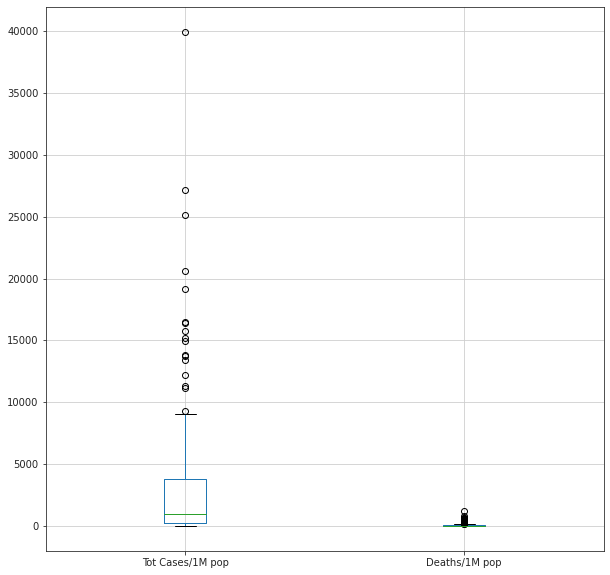

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
world_wide_df_final.boxplot(column=['Tot Cases/1M pop', 'Deaths/1M pop'])

**Визуелизација по региони за вкупно направени тестови**


In [50]:
fig = px.histogram(world_wide_df_final, x='Region', y='TotalTests')
fig.show()

***Приказ на вкупни забележани случаи поделени по држави во соодветни континенти***

In [51]:
fig = px.histogram(world_wide_df_final, x='Continent', y='TotalRecovered', color='Region')
fig.show()

**End of the project**